# Question 3

In this question, we asked to build the k-nearest neighbours algorithm on a dataset. In this, we should include the following:

- Analysis of classifier with different values of k (number of neighbors).
- Accuracy on both train and test data for the best model.
- Plot of the test data along with your classification boundary for the best model
- confusion matrices on the training and test data.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap as colors

In [ ]:
class KNN:
  def __init__(self, X, Y, k):
    self.X = X
    self.Y = Y
    self.k = k
  def distance(self, x, y, p=2):
    ans = np.sum(np.abs(x-y)**p)**(1.0/p)
    return ans
  def predict(self, X_test):
    predictions = np.zeros(len(X_test))
    for test_index, test_point in enumerate(X_test):
      distances = []
      for index, train_point in enumerate(self.X):
        dist = self.distance(train_point, test_point)
        distances.append((dist, self.Y[index]))
      distances.sort(key=lambda x: x[0])
      distances = distances[0:self.k]
      pos_output = [x[-1] for x in distances]
      predictions[test_index] = max(set(pos_output), key=pos_output.count)
    return predictions

In [ ]:
# confusion matrix
def getConfusionMatrix(pred, test_Y):
  k = max(test_Y)+1
  conf_mat = np.zeros((k,k))
  for i in range(len(test_Y)):
    conf_mat[int(pred[i])][test_Y[i]]+=1
  return conf_mat
# Accuracy
def getAccuracy(conf_mat):
  return (np.trace(conf_mat)/np.sum(conf_mat))*100

In [ ]:
def getPlotWithBoundary(train_X, pred, knn, p):
  x1_min, x1_max = train_X[:, 1].min() - 1, train_X[:,1].max() + 1
  x2_min, x2_max = train_X[:, 2].min() - 1, train_X[:,2].max() + 1
  xx, yy = np.meshgrid(np.arange(x1_min, x1_max, p), np.arange(x2_min, x2_max, p))
  d_train_X = np.c_[xx.ravel(),yy.ravel()]
  d_train_X = np.insert(d_train_X, 0, 1, axis=1)
  pred_decision_boundary = knn.predict(d_train_X)
  pred_decision_boundary = pred_decision_boundary.reshape(xx.shape)
  plt.contourf(xx, yy, pred_decision_boundary, cmap=color_map_l)
  plt.scatter(train_X[:, 1], train_X[:, 2], c=pred, cmap=color_map_b)

In [ ]:
def plotBoundary(train_X, knn, p):
  x1_min, x1_max = train_X[:, 1].min() - 1, train_X[:,1].max() + 1
  x2_min, x2_max = train_X[:, 2].min() - 1, train_X[:,2].max() + 1
  xx, yy = np.meshgrid(np.arange(x1_min, x1_max, p), np.arange(x2_min, x2_max, p))
  d_train_X = np.c_[xx.ravel(),yy.ravel()]
  d_train_X = np.insert(d_train_X, 0, 1, axis=1)
  pred_decision_boundary = knn.predict(d_train_X)
  pred_decision_boundary = pred_decision_boundary.reshape(xx.shape)
  plt.contourf(xx, yy, pred_decision_boundary, cmap=color_map_l)

In [ ]:
def getCMPlot(conf_mat, title):
  tick_label = ['',1, 2, 3, '']
  fig, (ax) = plt.subplots(ncols=1, figsize=(10, 5))
  ax.set_title('Confusion Matrix for ' + title + ' dataset')
  ax.set_xlabel('Target Class')
  ax.set_ylabel('Output Class')
  new_mat = []
  bottom = []
  temp = []
  for i in range(conf_mat.shape[1]):
    for j in range(conf_mat.shape[0]):
      c = (conf_mat[j][i]/np.sum(conf_mat))*100
      temp.append(c)
    tot = np.sum(conf_mat[i])
    p = (conf_mat[i][i]/tot)*100
    temp.append(p)
    new_mat.append(temp)
    temp = []
    tot = np.sum(conf_mat[:,i])
    p = (conf_mat[i][i]/tot)*100
    bottom.append(p)
  bottom.append(getAccuracy(conf_mat))
  new_mat.append(bottom)
  ax.matshow(new_mat, cmap='Wistia')
  tot = np.sum(conf_mat)
  for i in range(conf_mat.shape[1]):
    for j in range(conf_mat.shape[0]):
      c = conf_mat[j][i]
      ax.text(i, j, str(c),fontsize=18, va='center', ha='center')
      ax.text(i, j+0.25, str((c/tot)*100) + "%", fontsize=10, va='center', ha='center')
  for i in range(conf_mat.shape[0]):
    c = new_mat[conf_mat.shape[0]][i]
    ax.text(conf_mat.shape[0], i, str(c),color = 'green', fontsize=18, va='center', ha='center')
    ax.text(conf_mat.shape[0], i+0.25, str(100-c) + "%", color = 'red', fontsize=10, va='center', ha='center')
    c = new_mat[i][conf_mat.shape[0]]
    ax.text(i, conf_mat.shape[0], str(c),color = 'green', fontsize=16, va='center', ha='center')
    ax.text(i, conf_mat.shape[0]+0.25, str(100-c) + "%", color = 'red', fontsize=10, va='center', ha='center')
  ax.text(conf_mat.shape[0], conf_mat.shape[0], str(new_mat[conf_mat.shape[0]][conf_mat.shape[0]]), color = 'green', fontsize=16, va='center', ha='center')
  ax.text(conf_mat.shape[0], conf_mat.shape[0]+0.25, str(100-new_mat[conf_mat.shape[0]][conf_mat.shape[0]]), color = 'red', fontsize=10, va='center', ha='center')
  ax.set_xticklabels(tick_label)
  ax.set_yticklabels(tick_label)
  plt.show()

## (a) KNN on dataset 2

In [ ]:
train_dataset_path = '/content/gdrive/MyDrive/Dataset for PRML PA1/Dataset2/train_8.csv'
test_dataset_path = '/content/gdrive/MyDrive/Dataset for PRML PA1/Dataset2/test_8.csv'

train_dataset = pd.read_csv(train_dataset_path)
test_dataset = pd.read_csv(test_dataset_path)

train_X = train_dataset.iloc[:, 0:2].values
train_Y = train_dataset.iloc[:, 2].values
test_X = test_dataset.iloc[:, 0:2].values
test_Y = test_dataset.iloc[:, 2].values

# adding a column of 1's to train_X to mimic the bias component

train_X = np.insert(train_X, 0, 1, axis = 1)
test_X = np.insert(test_X, 0, 1, axis = 1)
color_map_l = colors(['navajowhite', 'skyblue', 'violet'])
color_map_b = colors(['orange', 'dodgerblue', 'purple'])
train_X.shape

(500, 3)

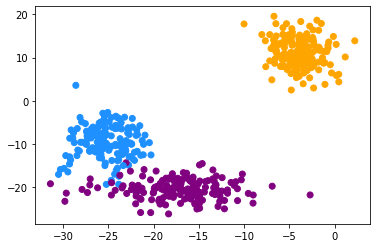

In [ ]:
plt.scatter(train_X[:, 1], train_X[:, 2], c=train_Y, cmap=color_map_b)

For K = 1: Train Acc -> 100.0: Test Acc -> 100.0
For K = 2: Train Acc -> 99.0: Test Acc -> 99.0
For K = 3: Train Acc -> 99.2: Test Acc -> 100.0
For K = 4: Train Acc -> 98.8: Test Acc -> 100.0
For K = 5: Train Acc -> 99.0: Test Acc -> 100.0
For K = 6: Train Acc -> 99.0: Test Acc -> 100.0
For K = 7: Train Acc -> 98.6: Test Acc -> 100.0
For K = 8: Train Acc -> 98.6: Test Acc -> 100.0
For K = 9: Train Acc -> 99.0: Test Acc -> 100.0
For K = 10: Train Acc -> 99.0: Test Acc -> 100.0
For K = 11: Train Acc -> 98.8: Test Acc -> 100.0
For K = 12: Train Acc -> 98.6: Test Acc -> 100.0
For K = 13: Train Acc -> 98.8: Test Acc -> 100.0
For K = 14: Train Acc -> 98.6: Test Acc -> 100.0
For K = 15: Train Acc -> 98.6: Test Acc -> 100.0
For K = 16: Train Acc -> 98.4: Test Acc -> 100.0
For K = 17: Train Acc -> 98.4: Test Acc -> 100.0
For K = 18: Train Acc -> 98.4: Test Acc -> 100.0
For K = 19: Train Acc -> 98.4: Test Acc -> 100.0
For K = 20: Train Acc -> 98.2: Test Acc -> 100.0
For K = 21: Train Acc -> 98.4

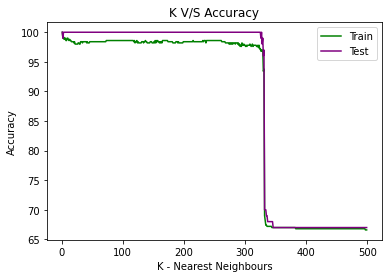

In [ ]:
train_acc = []
test_acc = []
k = []
for i in range(1,500):
  knn = KNN(train_X, train_Y, i)
  pred = knn.predict(train_X)
  conf_mat_train = getConfusionMatrix(pred, train_Y)
  pred = knn.predict(test_X)
  conf_mat_test = getConfusionMatrix(pred, test_Y)
  test_acc.append(getAccuracy(conf_mat_test))
  train_acc.append(getAccuracy(conf_mat_train))
  print("For K = " + str(i) + ": Train Acc -> " + str(getAccuracy(conf_mat_train)) + ": Test Acc -> " + str(getAccuracy(conf_mat_test)))
  k.append(i)

plt.plot(k, train_acc, label="Train", color="green")
plt.plot(k, test_acc, label="Test", color="purple")
plt.xlabel("K - Nearest Neighbours")
plt.ylabel("Accuracy")
plt.title("K V/S Accuracy")
plt.legend()
plt.show()

### Best Model
From the above results, we can say that the smallest k for which the model best fits is 9.

Given below is the accuracy, confusion matrix and decision boundaries on both training and test data.

In [ ]:
knn = KNN(train_X, train_Y, 1)
pred_train = knn.predict(train_X)
pred_test = knn.predict(test_X)

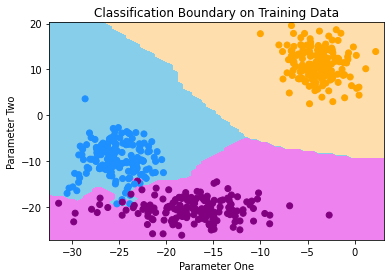

In [ ]:
plt.xlabel('Parameter One')
plt.ylabel('Parameter Two')
plt.title('Classification Boundary on Training Data')
getPlotWithBoundary(train_X, pred_train, knn, 0.5)

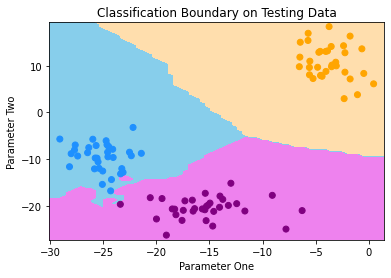

In [ ]:
plt.xlabel('Parameter One')
plt.ylabel('Parameter Two')
plt.title('Classification Boundary on Testing Data')
getPlotWithBoundary(test_X, pred_test, knn, 0.5)

<ipython-input-101-5e3c8c0d667d>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_label)
<ipython-input-101-5e3c8c0d667d>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(tick_label)


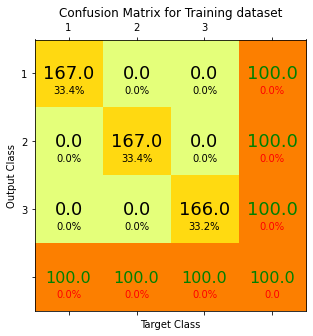

100.0
[[167.   0.   0.]
 [  0. 167.   0.]
 [  0.   0. 166.]]


In [ ]:
conf_mat = getConfusionMatrix(pred_train, train_Y)
accuracy = getAccuracy(conf_mat)
getCMPlot(conf_mat, "Training")
print(accuracy)
print(conf_mat)

<ipython-input-101-5e3c8c0d667d>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_label)
<ipython-input-101-5e3c8c0d667d>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(tick_label)


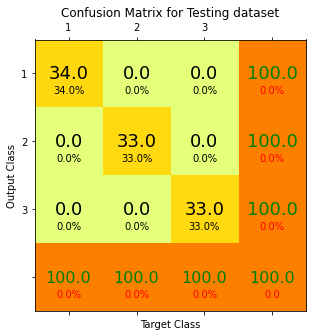

100.0
[[34.  0.  0.]
 [ 0. 33.  0.]
 [ 0.  0. 33.]]


In [ ]:
conf_mat = getConfusionMatrix(pred_test, test_Y)
accuracy = getAccuracy(conf_mat)
getCMPlot(conf_mat, "Testing")
print(accuracy)
print(conf_mat)

# (b) KNN on Dataset3

In [ ]:
train_dataset_path = '/content/gdrive/MyDrive/Dataset for PRML PA1/Dataset3/train_8.csv'
test_dataset_path = '/content/gdrive/MyDrive/Dataset for PRML PA1/Dataset3/test_8.csv'

train_dataset = pd.read_csv(train_dataset_path)
test_dataset = pd.read_csv(test_dataset_path)

train_X = train_dataset.iloc[:, 0:2].values
train_Y = train_dataset.iloc[:, 2].values
test_X = test_dataset.iloc[:, 0:2].values
test_Y = test_dataset.iloc[:, 2].values

# adding a column of 1's to train_X to mimic the bias component

train_X = np.insert(train_X, 0, 1, axis = 1)
test_X = np.insert(test_X, 0, 1, axis = 1)
color_map_l = colors(['navajowhite', 'black', 'violet'])
color_map_b = colors(['orange', 'dodgerblue', 'purple'])
train_X.shape

(500, 3)

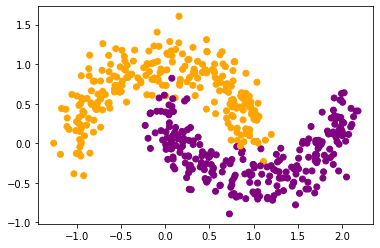

In [ ]:
plt.scatter(train_X[:, 1], train_X[:, 2], c=train_Y, cmap=color_map_b)

For K = 1:
For K = 1: Train Acc -> 100.0: Test Acc -> 100.0
For K = 2:
For K = 2: Train Acc -> 98.8: Test Acc -> 99.0
For K = 3:
For K = 3: Train Acc -> 98.6: Test Acc -> 99.0
For K = 4:
For K = 4: Train Acc -> 98.4: Test Acc -> 99.0
For K = 5:
For K = 5: Train Acc -> 99.0: Test Acc -> 99.0
For K = 6:
For K = 6: Train Acc -> 98.2: Test Acc -> 99.0
For K = 7:
For K = 7: Train Acc -> 98.4: Test Acc -> 99.0
For K = 8:
For K = 8: Train Acc -> 98.4: Test Acc -> 99.0
For K = 9:
For K = 9: Train Acc -> 98.4: Test Acc -> 99.0
For K = 10:
For K = 10: Train Acc -> 98.4: Test Acc -> 99.0
For K = 11:
For K = 11: Train Acc -> 98.2: Test Acc -> 99.0
For K = 12:
For K = 12: Train Acc -> 98.0: Test Acc -> 99.0
For K = 13:
For K = 13: Train Acc -> 98.2: Test Acc -> 99.0
For K = 14:
For K = 14: Train Acc -> 98.4: Test Acc -> 99.0
For K = 15:
For K = 15: Train Acc -> 98.4: Test Acc -> 99.0
For K = 16:
For K = 16: Train Acc -> 98.2: Test Acc -> 99.0
For K = 17:
For K = 17: Train Acc -> 98.2: Test Acc -> 9

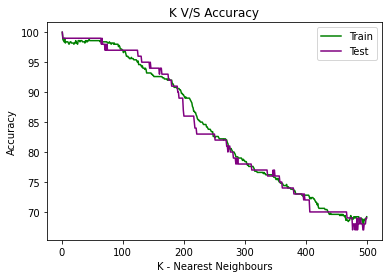

In [ ]:
test_acc = []
train_acc = []
k = []
for i in range(1, train_X.shape[0]):
  print("For K = " + str(i) + ":")
  knn = KNN(train_X, train_Y, i)
  pred = knn.predict(train_X)
  conf_mat_train = getConfusionMatrix(pred, train_Y)
  pred = knn.predict(test_X)
  conf_mat_test = getConfusionMatrix(pred, test_Y)
  test_acc.append(getAccuracy(conf_mat_test))
  train_acc.append(getAccuracy(conf_mat_train))
  print("For K = " + str(i) + ": Train Acc -> " + str(getAccuracy(conf_mat_train)) + ": Test Acc -> " + str(getAccuracy(conf_mat_test)))
  k.append(i)

plt.plot(k, train_acc, label="Train", color="green")
plt.plot(k, test_acc, label="Test", color="purple")
plt.xlabel("K - Nearest Neighbours")
plt.ylabel("Accuracy")
plt.title("K V/S Accuracy")
plt.legend()
plt.show()

# Best Model

In [ ]:
knn = KNN(train_X, train_Y, 1)
pred_train = knn.predict(train_X)
pred_test = knn.predict(test_X)

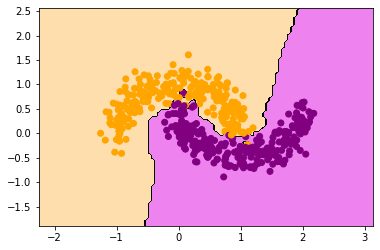

In [ ]:
plotBoundary(train_X, knn, 0.05)
plt.scatter(train_X[:, 1], train_X[:, 2], c=train_Y, cmap=color_map_b)

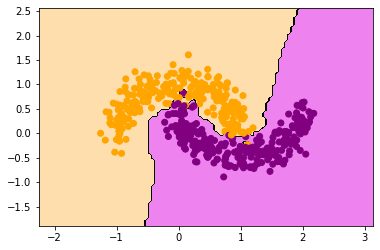

In [ ]:
getPlotWithBoundary(train_X, pred_train, knn, 0.05)

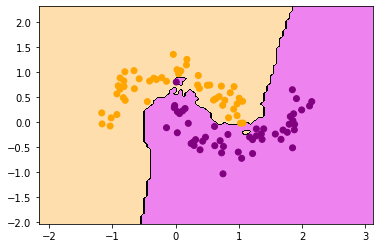

In [ ]:
plotBoundary(test_X, knn, 0.05)
plt.scatter(test_X[:, 1], test_X[:, 2], c=test_Y, cmap=color_map_b)

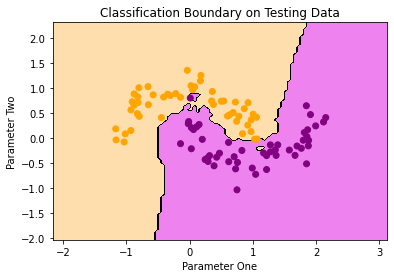

In [ ]:
plt.xlabel('Parameter One')
plt.ylabel('Parameter Two')
plt.title('Classification Boundary on Testing Data')
getPlotWithBoundary(test_X, pred_test, knn, 0.05)

<ipython-input-101-5e3c8c0d667d>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_label)
<ipython-input-101-5e3c8c0d667d>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(tick_label)


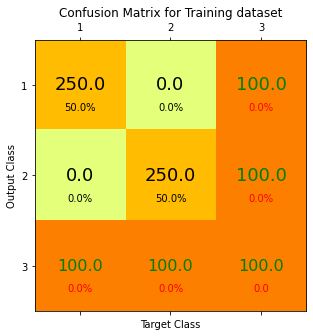

100.0
[[250.   0.]
 [  0. 250.]]


In [ ]:
conf_mat = getConfusionMatrix(pred_train, train_Y)
accuracy = getAccuracy(conf_mat)
getCMPlot(conf_mat, "Training")
print(accuracy)
print(conf_mat)

<ipython-input-101-5e3c8c0d667d>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_label)
<ipython-input-101-5e3c8c0d667d>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(tick_label)


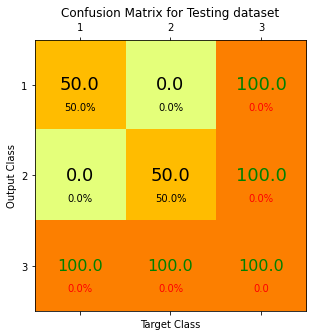

100.0
[[50.  0.]
 [ 0. 50.]]


In [ ]:
conf_mat = getConfusionMatrix(pred_test, test_Y)
accuracy = getAccuracy(conf_mat)
getCMPlot(conf_mat, "Testing")
print(accuracy)
print(conf_mat)